<a href="https://colab.research.google.com/github/Phund4Bot/DZ/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
## Выполнил студент группы ГРУППА ФИО

### Оглавление
1. [Задание 1](#Задание-№1)
2. [Задание 2](#Задание-№2)
3. [Задание 3](#Задание-№3)
4. [Вывод](#Вывод)

### Задание №1
<i> Вызвать функцию print() и передать туда строку Hello, World! </i>

In [ ]:
print('Hello world')

Hello world


### Задание №2
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры <b>m</b>, <b>n</b>, <b>min_limit</b>, <b>max_limit</b>, где <b>m</b> и <b>n</b> указывают размер
матрицы, а <b>min_lim</b> и <b>max_lim</b> - минимальное и максимальное значение для
генерируемого числа.

In [ ]:
import random
import time
user_m = input()
user_n = input()
user_min_limit = input()
user_max_limit = input()
def generateMatrix(m, n, minlimit, maxlimit):
  matrix = []
  for i in range(int(m)):
    matrix.append([])
    for j in range(int(n)):
      matrix[i].append(random.randint(int(minlimit), int(maxlimit)))

  return matrix

print(generateMatrix(user_m, user_n, user_min_limit, user_max_limit))

2
2
3
6
[[4, 3], [4, 5]]


('2', '2', '3', '6')

### Задание №3
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.

In [98]:
import copy
import random
import time
import matplotlib.pyplot as plt
import numpy as np

def generateMatrix(m, n, minlimit, maxlimit):
  matrix = []
  for i in range(int(m)):
    matrix.append([])
    for j in range(int(n)):
      matrix[i].append(random.randint(int(minlimit), int(maxlimit)))
  return matrix

def printMatrix(matrix):
  for k in range(0, len(matrix)):
    print(matrix[k])


def generateGraphic(myfunc, minb, maxb, step, size):
  x = []
  for i in range(minb, maxb, step):
    x.append(i)
  owny = []
  standy = []
  for k in range(minb, maxb, step):
    start_time = time.time()
    matrix = generateMatrix(size, k, 0, 100)
    copymatrix = copy.deepcopy(matrix)
    myfunc(copymatrix)
    myfunctime = round((time.time() - start_time)*1000)
    owny.append(myfunctime)

    start_time = time.time()
    copymatrix = copy.deepcopy(matrix)
    for i in range(0, len(copymatrix)):
      copymatrix[i].sort()
    standtime = round((time.time() - start_time)*1000)
    standy.append(standtime)

  plt.plot(x, owny, label="my", color="red")
  plt.plot(x, standy, label="standart", color="green")
  plt.xlabel('size')
  plt.ylabel('time')
  plt.legend()
  plt.show()

[0, 1, 3, 3, 4, 6, 6, 7, 8, 9]
[0, 0, 1, 1, 2, 3, 5, 7, 8, 10]
[1, 4, 5, 5, 6, 6, 6, 7, 8, 9]
[1, 1, 4, 6, 6, 6, 7, 7, 8, 10]
[0, 0, 1, 2, 3, 4, 5, 6, 8, 9]
[0, 2, 3, 5, 6, 6, 7, 8, 9, 9]
[0, 4, 4, 5, 6, 6, 7, 7, 8, 10]
[2, 3, 4, 5, 5, 6, 6, 7, 9, 9]
[1, 5, 5, 7, 8, 8, 9, 10, 10, 10]
[0, 0, 2, 3, 5, 5, 6, 7, 8, 9]


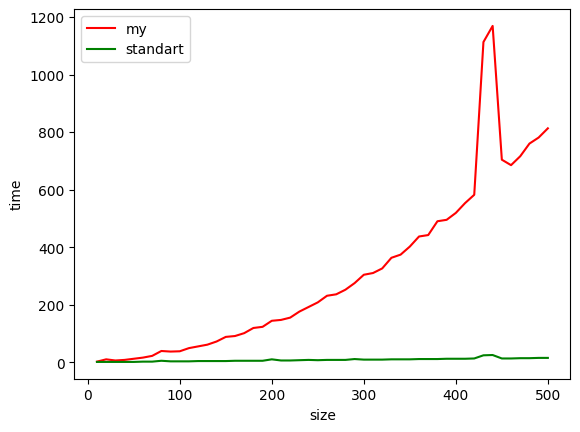

In [88]:
# Сортировка выбором.
# Берётся срез массива, в котором минимальный элемент переносят в самый левый угол,
# после чего срез уменьшается и цикл повторяется.
# Сложность: O(n^2)

def selectionSort(mat):
    for k in range(0, len(mat)):
      for i in range(0, len(mat[k]) - 1):
        minel = i
        for j in range(i + 1, len(mat[k])):
          if mat[k][j] < mat[k][minel]:
            minel = j
        mat[k][i], mat[k][minel] = mat[k][minel], mat[k][i]

matrix = generateMatrix(10, 10, 0, 10)
selectionSort(matrix)
printMatrix(matrix)

generateGraphic(selectionSort, 10, 501, 10, 50)

[0, 1, 3, 4, 5, 6, 7, 8, 10, 10]
[0, 1, 2, 3, 3, 4, 6, 6, 9, 9]
[1, 1, 1, 1, 5, 5, 8, 9, 9, 10]
[0, 1, 2, 3, 5, 8, 8, 8, 10, 10]
[0, 3, 3, 3, 4, 5, 6, 7, 9, 10]
[0, 1, 2, 2, 2, 4, 5, 5, 6, 9]
[0, 1, 2, 4, 5, 6, 6, 7, 8, 9]
[1, 2, 3, 4, 4, 5, 6, 8, 8, 10]
[0, 3, 3, 4, 4, 6, 7, 7, 7, 9]
[1, 1, 2, 2, 4, 5, 6, 6, 8, 10]


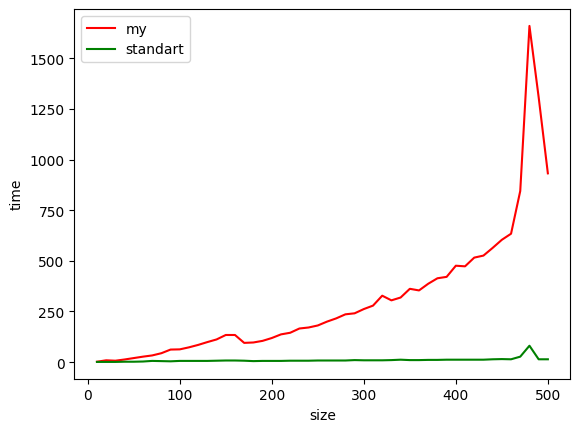

In [89]:
# Сортировка вставкой.
# Сложность O(n^2)

def insertionSort(mat):
  for k in range(0, len(mat)):
    for i in range(1, len(mat[k])):
        temp = mat[k][i]
        j = i - 1
        while (j >= 0 and temp < mat[k][j]):
            mat[k][j + 1] = mat[k][j]
            j = j - 1
        mat[k][j + 1] = temp

matrix = generateMatrix(10, 10, 0, 10)
insertionSort(matrix)
printMatrix(matrix)

generateGraphic(insertionSort, 10, 501, 10, 50)

[0, 0, 2, 3, 4, 4, 4, 5, 9, 10]
[0, 1, 2, 3, 3, 4, 5, 8, 8, 9]
[0, 0, 1, 2, 5, 6, 8, 8, 9, 10]
[0, 0, 4, 4, 5, 6, 9, 9, 10, 10]
[0, 1, 1, 2, 3, 5, 6, 8, 9, 9]
[1, 2, 2, 3, 4, 4, 5, 6, 6, 10]
[0, 0, 4, 4, 6, 6, 6, 7, 8, 9]
[0, 0, 1, 2, 2, 4, 5, 6, 9, 10]
[0, 2, 3, 4, 5, 5, 6, 9, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 9, 10, 10]


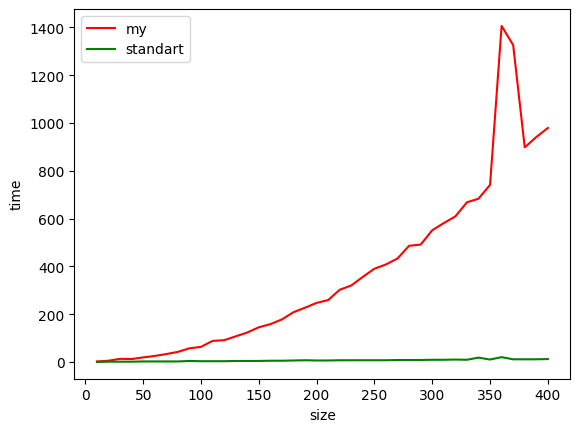

In [93]:
# Сортировка обменом. || Сортировка пузырьком.
# Сложность O(n^2)
def bubbleSort(mat):
  for k in range(0, len(mat)):
    for i in range(len(mat[k]) - 1, 0, -1):
        for j in range(0, i):
            if mat[k][j + 1] < mat[k][j]:
                mat[k][j], mat[k][j + 1] = mat[k][j + 1], mat[k][j]

matrix = generateMatrix(10, 10, 0, 10)
bubbleSort(matrix)
printMatrix(matrix)

generateGraphic(bubbleSort, 10, 401, 10, 50)

[0, 0, 1, 2, 4, 7, 8, 8, 10, 10]
[3, 4, 6, 6, 7, 7, 7, 8, 9, 10]
[3, 4, 5, 5, 7, 7, 7, 10, 10, 10]
[2, 2, 4, 4, 6, 7, 8, 8, 9, 10]
[0, 2, 4, 4, 7, 7, 9, 9, 10, 10]
[1, 3, 3, 3, 4, 6, 7, 8, 10, 10]
[0, 1, 1, 2, 4, 5, 7, 7, 9, 10]
[1, 1, 2, 4, 4, 5, 6, 6, 7, 9]
[0, 0, 0, 2, 2, 4, 5, 9, 10, 10]
[0, 2, 5, 6, 6, 7, 7, 9, 9, 9]


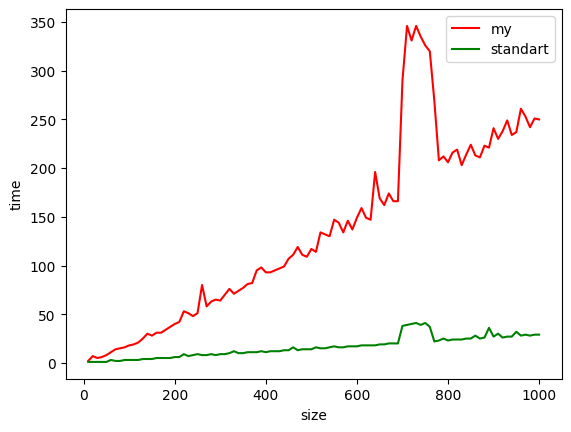

In [97]:
# Сортировка Шелла.
# Сложность O(n^2)
import math
def shellSort(mat):
  for k in range(0, len(mat)):
    size = len(mat[k])
    interval = size // 2
    while interval > 0:
        for i in range(interval, size):
            temp = mat[k][i]
            j = i
            while j >= interval and mat[k][j - interval] > temp:
                mat[k][j] = mat[k][j - interval]
                j -= interval
            mat[k][j] = temp
        interval //= 2

matrix = generateMatrix(10, 10, 0, 10)
shellSort(matrix)
printMatrix(matrix)

generateGraphic(shellSort, 10, 1001, 10, 50)

In [96]:
# Быстрая сортировка.
# Сложность O(nlogn)



--- 0 ms ---


In [ ]:
# Турнирная сортировка.
start_time = time.time()
#TODO
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

### Вывод
